In [19]:
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv("estonia.csv")

In [21]:
Sex_counts = df['Sex'].value_counts()

In [22]:
print(Sex_counts)

M    503
F    486
Name: Sex, dtype: int64


In [23]:
maleSurvive = 0
femaleSurvive = 0
maleDied = 0
femaleDied = 0
for idx in range(len(df)):
    if df.loc[idx]["Sex"] == "M" and df.loc[idx]["Survived"] == 0:
        maleDied +=1
    elif df.loc[idx]["Sex"] == "M" and df.loc[idx]["Survived"] == 1:
        maleSurvive +=1
    elif df.loc[idx]["Sex"] == "F" and df.loc[idx]["Survived"] == 0:
        femaleDied +=1
    elif df.loc[idx]["Sex"] == "F" and df.loc[idx]["Survived"] == 1:
        femaleSurvive +=1
conTable = pd.DataFrame({
    "Male": [maleSurvive, maleDied],
    "Female": [femaleSurvive, femaleDied]
})
conTable.index = ["Survived", "Died"]
conTable.head()

,Male,Female
Survived,110,27
Died,393,459


In [24]:
children = df[df['Age'] < 18]
adults = df[df['Age'] >= 18]

In [25]:
children_count = len(children)
adults_count = len(adults)
total_count = len(df)

In [26]:
relative_frequency_children = children_count / total_count
relative_frequency_adults = adults_count / total_count
print(f"Relative Frequency of Children: {relative_frequency_children:.2%}")
print(f"Relative Frequency of Adults: {relative_frequency_adults:.2%}")

Relative Frequency of Children: 2.43%
Relative Frequency of Adults: 97.57%


In [27]:
maleSurvive = 0
maleDied = 0
femaleSurvive = 0
femaleDied = 0

for idx in range(len(df)):
    if df.loc[idx]["Survived"] == 0 and df.loc[idx]["Sex"] == "M":
        maleDied += 1
    elif df.loc[idx]["Survived"] == 1 and df.loc[idx]["Sex"] == "M":
        maleSurvive += 1
    elif df.loc[idx]["Survived"] == 0 and df.loc[idx]["Sex"] == "F":
        femaleDied += 1
    elif df.loc[idx]["Survived"] == 1 and df.loc[idx]["Sex"] == "F":
        femaleSurvive += 1

conTable = pd.DataFrame({
    "Male": [maleSurvive, maleDied],
    "Female": [femaleSurvive, femaleDied]})
conTable.index = ["Survived", "Died"]

In [28]:
print(conTable)

          Male  Female
Survived   110      27
Died       393     459


In [33]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    else:
        return 'Adult'

In [34]:
df['AgeGroup'] = df['Age'].apply(categorize_age)

In [35]:
df['SurvivalStatus'] = df['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Died')

[Text(0.5, 1.0, 'Survival of Children and Adults on MS Estonia'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Count')]

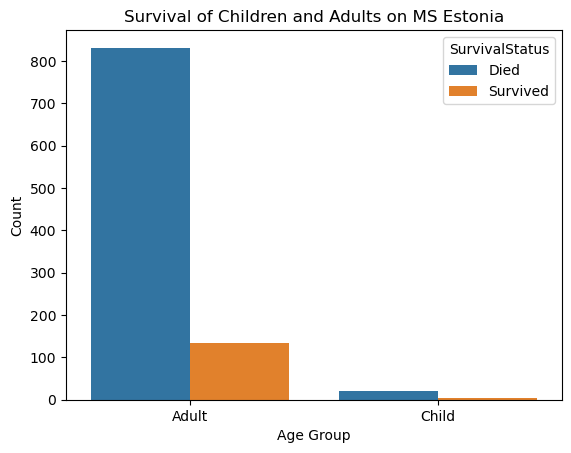

In [36]:
sns.countplot(data=df, x='AgeGroup', hue='SurvivalStatus').set(
    title='Survival of Children and Adults on MS Estonia',
    xlabel='Age Group',
    ylabel='Count'
)

In [41]:
AdultSurvive = 0
AdultDied = 0
ChildSurvive = 0
ChildDied = 0

for idx in range(len(df)):
    age_group = categorize_age(df.loc[idx]["Age"]) 
    survived = df.loc[idx]["Survived"]
    
    if age_group == "Child" and survived == 0:
        ChildDied += 1
    elif age_group == "Child" and survived == 1:
        ChildSurvive += 1
    elif age_group == "Adult" and survived == 0:
        AdultDied += 1
    elif age_group == "Adult" and survived == 1:
        AdultSurvive += 1

conTable = pd.DataFrame({
    "Children": [ChildSurvive, ChildDied],
    "Adults": [AdultSurvive, AdultDied]
})
conTable.index = ["Survived", "Died"]

conTable.head()

,Children,Adults
Survived,3,134
Died,21,831
